In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pl
import scipy as sp
import random
import matplotlib
import time
import fct_setup as setup
import fct_general as fct

setup.SetPlotParams()

c_fullrank_light = 'darkgrey'
c_fullrank_dark = 'dimgrey'
c_lowrank_light = '#E2AF8A'
c_lowrank_dark = '#BB5439'

### Rank one - fixed fraction of connections $s$

In [34]:
"""
General parameters
"""

N = 2000     # number of units
sigma = 7    # rank-one connection strength
rho = 2      # rank-one overlap 


In [35]:
"""
Eigenvalues as a function of sparsity
"""

m, n = fct.make_connectivity_vectors(N, sigma, rho)    # connectivity vectors
P = np.outer(m, n) / N                                 # rank-one fully-connected matrix
        
repeats = 1

sparsities = np.linspace(0, 1, 15) 

theor_bulk = sigma**2 * np.sqrt(sparsities*(1-sparsities)/N)   # theoretical bulk 
theor_outlier = rho**2 * (1 - sparsities)                      # theoretical outlier 

data_outlier_avg = []
data_bulk_avg = []

for s in sparsities:
    
    data_outlier = []
    data_bulk = []
    
    for r in range(repeats):
        
        P_tilde = fct.sparsify(P, N, s)
        
        P_cutoff = P_tilde - (1-s)*P   # define cutoff matrix
        eigvals = sp.linalg.eigvals(P_tilde) 
        eigvals = eigvals[eigvals.argsort()[::-1]]  # order eigenvalues
        
        data_outlier.append(eigvals[0].real)                 # empirical outlier
        data_bulk.append(np.mean(np.abs(eigvals)[1:3]))      # empirical bulk 
    
    data_outlier_avg.append(np.mean(data_outlier))
    data_bulk_avg.append(np.mean(data_bulk))


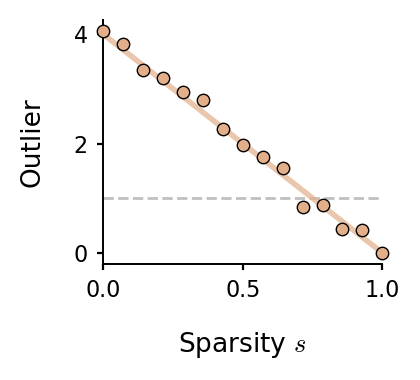

In [36]:
# Plot outlier 

fig, ax = plt.subplots(figsize=(2.2, 2), dpi=200)
ax.axhline(1, c='silver', ls='--')
ax.plot(sparsities, theor_outlier, c=c_lowrank_light, label='Theory', lw=2, alpha=0.7)
ax.scatter(sparsities, data_outlier_avg, fc=c_lowrank_light, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)
ax.set_xlabel(r'Sparsity $s$')
ax.set_ylabel(r'Outlier')

plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=5)

ax.set_xlim(0, 1)
plt.locator_params(axis='y', nbins=3)
sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout()

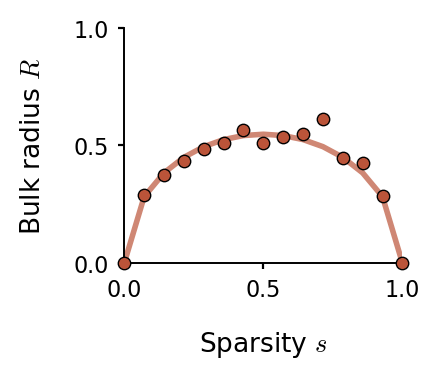

In [37]:
# Plot bulk 

fig, ax = plt.subplots(figsize=(2.3, 2), dpi=200)
ax.plot(sparsities, theor_bulk, c=c_lowrank_dark, label='Theory', lw=2, alpha=0.7)
ax.scatter(sparsities, data_bulk_avg, fc=c_lowrank_dark, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)
ax.set_xlabel(r'Sparsity $s$')
ax.set_ylabel(r'Bulk radius $R$')

plt.locator_params(axis='x', nbins=3)
plt.locator_params(axis='y', nbins=5)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.locator_params(axis='y', nbins=3)
sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout()

### Rank one - fixed number of connections $C$

In [39]:
"""
General parameters
"""
 
C = 200        # number of connections
sigma = 5.2    # rank-one connection strength
rho = 2        # rank-one overlap 

In [48]:
"""
Radius as function of number of units
"""

repeats = 10

Ns = np.linspace(C, 10*C, 12).astype('int')  
Ns[-1] = 10 * C  
sparsities = 1-C/Ns

r_data_avg = []
Ns_fine = np.arange(C, 10*C+10, 10)   
r_theoretical = (np.sqrt(C) * sigma**2 * np.sqrt(Ns_fine-C))/np.sqrt(Ns_fine**3)
    
for N in Ns:
    
    r_data = []
    m, n = fct.make_connectivity_vectors(N, sigma, rho)    # connectivity vectors
    P = np.outer(m, n) / N                                 # rank-one fully-connected matrix     

    for r in range(repeats):
        
        P_tilde = fct.sparsify_columns(P, N, C)
        P_cutoff = P_tilde - (C/N)*P 
        eigvals_P_tilde = sp.linalg.eigvals(P_tilde) 
        eigvals_P_tilde = eigvals_P_tilde[eigvals_P_tilde.argsort()[::-1]]  
        r_data.append(np.mean(np.abs(eigvals_P_tilde)[1:3]))

    r_data_avg.append(np.mean(r_data))
    r_data_variance_avg.append(np.mean(r_data_variance))

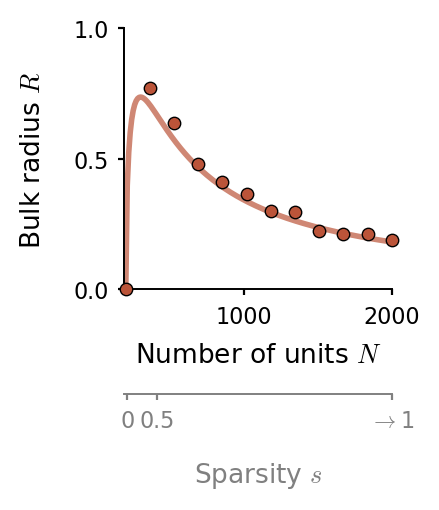

In [49]:
fig, ax = plt.subplots(figsize=(2.3, 2.5), dpi=200)

ax.plot(Ns_fine, r_theoretical, c=c_lowrank_dark, label='Theory', lw=2, alpha=0.7)
ax.scatter(Ns, r_data_avg, fc=c_lowrank_dark, ec='black', lw=.5, label='Data', s=20, zorder=3, clip_on=False)
ax.set_xlabel(r'Number of units $N$', labelpad=5)
ax.set_ylabel(r'Bulk radius $R$')
ax.set_xlim(C-10, Ns[-1])
ax.set_ylim(0, 1)
plt.locator_params(axis='x', nbins=3)

# plot second x axis showing sparsity

ax2 = ax.twiny()
ax2.set_xlabel(r'Sparsity $s$')
ax2.set_xlim(C-20, Ns[-1])
ax2.set_xticks((C / (1 - np.array([0, 0.5, 0.9]))))
ax2.set_xticklabels(['0', '0.5', r'$\rightarrow$1'])                     
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.4))
ax.set_zorder(ax2.get_zorder()+1)

# change color of second x axis
color='grey'
ax2.spines['bottom'].set_color(color)
ax2.tick_params(axis='x', colors=color)
ax2.tick_params(axis='y', colors=color)
ax2.yaxis.label.set_color(color)
ax2.xaxis.label.set_color(color)

plt.locator_params(axis='y', nbins=3)
sns.despine(top=True, right=True, left=False, bottom=False)
fig.tight_layout()